# Support Vector Machine:
For multiclass classification:

Reference: https://www.baeldung.com/cs/svm-multiclass-classification

Testuen sailkapena gaika:
* Gizartea --> 0
* Politika --> 1
* Kirola --> 2
* Zientzia eta teknologia --> 3
* Ekonomia --> 4
* Historia --> 5
* Geografia --> 6

In [80]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.utils import shuffle

## One-to-one approach:
Breaks down the multiclass problem into multiple binary classification problems. A binary classifier per each pair of classes. the classifier can use $\pmb{\frac{m (m-1)}{2}}$ SVMs:
![My Figure](Figures/onetoone.png)


In [81]:
with open('Data def/X_train.bin', 'rb') as f:
    X_train = np.load(f)
with open('Data def/X_test.bin', 'rb') as f:
    X_test = np.load(f)
with open('Data def/y_train.bin', 'rb') as f:
    y_train = np.load(f)
with open('Data def/y_test.bin', 'rb') as f:
    y_test = np.load(f)

In [82]:
class Dataset:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
data = Dataset(X_train, X_test, y_train, y_test)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7822222222222223


In [83]:
def score(data, model):
    y_pred = model.predict(data.X_test)
    return accuracy_score(data.y_test, y_pred)
    
@ignore_warnings(category=ConvergenceWarning)
def fit_score(data, model):
    model.fit(data.X_train, data.y_train)
    return score(data, model)

Parametro egokienak bilatzeko:

In [84]:
@ignore_warnings(category=ConvergenceWarning)
def search_hyperparameters(data, model, param_grid, cv=5, verbose=0):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=cv,scoring='accuracy',verbose=verbose
    )
    grid_search.fit(data.X_train, data.y_train)
    return grid_search

In [9]:
params = {'C': [1e-6, 1e-5, 1e-4, 1e-3], 'kernel': ['linear', 'poly', 'rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .............................C=1e-06, kernel=linear; total time=  29.7s
[CV] END .............................C=1e-06, kernel=linear; total time=  32.7s
[CV] END .............................C=1e-06, kernel=linear; total time=  29.3s
[CV] END .............................C=1e-06, kernel=linear; total time=  29.6s
[CV] END .............................C=1e-06, kernel=linear; total time=  29.7s
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.5min
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.7min
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.4min
[CV] END ................................C=1e-06, kernel=rbf; total time= 1.5min
[CV] END ................................C=1e-06

In [11]:
params = {'C': [1e-8, 1e-7, 1e-6], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .............................C=1e-08, kernel=linear; total time=  46.9s
[CV] END .............................C=1e-08, kernel=linear; total time=  47.7s
[CV] END .............................C=1e-08, kernel=linear; total time=  47.2s
[CV] END .............................C=1e-08, kernel=linear; total time=  47.8s
[CV] END .............................C=1e-08, kernel=linear; total time=  47.4s
[CV] END .............................C=1e-07, kernel=linear; total time=  32.2s
[CV] END .............................C=1e-07, kernel=linear; total time=  32.5s
[CV] END .............................C=1e-07, kernel=linear; total time=  31.9s
[CV] END .............................C=1e-07, kernel=linear; total time=  32.7s
[CV] END .............................C=1e-07, kernel=linear; total time=  32.3s
[CV] END .............................C=1e-06, kernel=linear; total time=  29.2s
[CV] END .............................C=1e-06, ke

In [10]:
model = SVC(random_state=42, kernel = 'linear', C = 1e-6, ) # Best param: {C = 1e-6, kernel = 'linear'}
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 91.6%


In [12]:
model = SVC(random_state=42)
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 81.3%


Barridoaren bitartez %10 hobetu da etekina:

{C = 1e-6, kernel = 'linear'}

### Adierazpen grafikoa:

In [35]:
params = {'C': [1e-8], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................C=1e-08, kernel=linear; total time=  48.8s
[CV] END .............................C=1e-08, kernel=linear; total time=  54.4s
[CV] END .............................C=1e-08, kernel=linear; total time=  54.7s
[CV] END .............................C=1e-08, kernel=linear; total time=  52.6s
[CV] END .............................C=1e-08, kernel=linear; total time=  49.2s
grid_search.best_params_ = {'C': 1e-08, 'kernel': 'linear'}
grid_search.best_score_ = np.float64(0.8237175679760995)


In [36]:
params = {'C': [1e-7], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................C=1e-07, kernel=linear; total time=  33.7s
[CV] END .............................C=1e-07, kernel=linear; total time=  33.9s
[CV] END .............................C=1e-07, kernel=linear; total time=  33.3s
[CV] END .............................C=1e-07, kernel=linear; total time=  37.0s
[CV] END .............................C=1e-07, kernel=linear; total time=  33.4s
grid_search.best_params_ = {'C': 1e-07, 'kernel': 'linear'}
grid_search.best_score_ = np.float64(0.8900812690057439)


In [37]:
params = {'C': [1e-6], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................C=1e-06, kernel=linear; total time=  30.8s
[CV] END .............................C=1e-06, kernel=linear; total time=  29.8s
[CV] END .............................C=1e-06, kernel=linear; total time=  29.4s
[CV] END .............................C=1e-06, kernel=linear; total time=  37.0s
[CV] END .............................C=1e-06, kernel=linear; total time=  29.8s
grid_search.best_params_ = {'C': 1e-06, 'kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9100654420002489)


In [38]:
params = {'C': [1e-5], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................C=1e-05, kernel=linear; total time=  30.7s
[CV] END .............................C=1e-05, kernel=linear; total time=  29.8s
[CV] END .............................C=1e-05, kernel=linear; total time=  30.4s
[CV] END .............................C=1e-05, kernel=linear; total time=  30.3s
[CV] END .............................C=1e-05, kernel=linear; total time=  30.3s
grid_search.best_params_ = {'C': 1e-05, 'kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9076133231376593)


In [39]:
params = {'C': [1e-4], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................C=0.0001, kernel=linear; total time=  30.9s
[CV] END ............................C=0.0001, kernel=linear; total time=  29.7s
[CV] END ............................C=0.0001, kernel=linear; total time=  30.3s
[CV] END ............................C=0.0001, kernel=linear; total time=  30.4s
[CV] END ............................C=0.0001, kernel=linear; total time=  30.4s
grid_search.best_params_ = {'C': 0.0001, 'kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9076133231376593)


In [40]:
params = {'C': [1e-3], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............................C=0.001, kernel=linear; total time=  29.8s
[CV] END .............................C=0.001, kernel=linear; total time=  31.4s
[CV] END .............................C=0.001, kernel=linear; total time=  32.5s
[CV] END .............................C=0.001, kernel=linear; total time=  30.0s
[CV] END .............................C=0.001, kernel=linear; total time=  29.8s
grid_search.best_params_ = {'C': 0.001, 'kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9076133231376593)


In [41]:
params = {'C': [1e-2], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............................C=0.01, kernel=linear; total time=  30.9s
[CV] END ..............................C=0.01, kernel=linear; total time=  29.8s
[CV] END ..............................C=0.01, kernel=linear; total time=  30.5s
[CV] END ..............................C=0.01, kernel=linear; total time=  30.7s
[CV] END ..............................C=0.01, kernel=linear; total time=  30.6s
grid_search.best_params_ = {'C': 0.01, 'kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9076133231376593)


In [42]:
params = {'C': [0.1], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............................C=0.1, kernel=linear; total time=  31.1s
[CV] END ...............................C=0.1, kernel=linear; total time=  29.9s
[CV] END ...............................C=0.1, kernel=linear; total time=  30.5s
[CV] END ...............................C=0.1, kernel=linear; total time=  30.6s
[CV] END ...............................C=0.1, kernel=linear; total time=  30.5s
grid_search.best_params_ = {'C': 0.1, 'kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9076133231376593)


In [43]:
params = {'C': [1], 'kernel': ['linear']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................C=1, kernel=linear; total time=  31.0s
[CV] END .................................C=1, kernel=linear; total time=  30.4s
[CV] END .................................C=1, kernel=linear; total time=  31.1s
[CV] END .................................C=1, kernel=linear; total time=  31.6s
[CV] END .................................C=1, kernel=linear; total time=  31.2s
grid_search.best_params_ = {'C': 1, 'kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9076133231376593)


### kernel : rbf

In [64]:
params = {'C': [1], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....................................C=1, kernel=rbf; total time= 1.1min
[CV] END ....................................C=1, kernel=rbf; total time= 1.1min
[CV] END ....................................C=1, kernel=rbf; total time= 1.1min
[CV] END ....................................C=1, kernel=rbf; total time= 1.1min
[CV] END ....................................C=1, kernel=rbf; total time= 1.1min
grid_search.best_params_ = {'C': 1, 'kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.7988312912346842)


In [71]:
params = {'C': [0.1], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.5min
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.5min
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.5min
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.5min
[CV] END ..................................C=0.1, kernel=rbf; total time= 1.5min
grid_search.best_params_ = {'C': 0.1, 'kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.5886098909892767)


In [72]:
params = {'C': [1e-2], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................C=0.01, kernel=rbf; total time= 1.6min
[CV] END .................................C=0.01, kernel=rbf; total time= 1.6min
[CV] END .................................C=0.01, kernel=rbf; total time= 1.7min
[CV] END .................................C=0.01, kernel=rbf; total time= 1.8min
[CV] END .................................C=0.01, kernel=rbf; total time= 1.6min
grid_search.best_params_ = {'C': 0.01, 'kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.45475112478437935)


In [73]:
params = {'C': [1e-3], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=0.001, kernel=rbf; total time= 1.7min
[CV] END ................................C=0.001, kernel=rbf; total time= 1.6min
[CV] END ................................C=0.001, kernel=rbf; total time= 1.5min
[CV] END ................................C=0.001, kernel=rbf; total time= 1.6min
[CV] END ................................C=0.001, kernel=rbf; total time= 1.6min
grid_search.best_params_ = {'C': 0.001, 'kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.45475112478437935)


In [75]:
params = {'C': [1e-4], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............................C=0.0001, kernel=rbf; total time= 1.5min
[CV] END ...............................C=0.0001, kernel=rbf; total time= 1.5min
[CV] END ...............................C=0.0001, kernel=rbf; total time= 1.7min
[CV] END ...............................C=0.0001, kernel=rbf; total time= 1.6min
[CV] END ...............................C=0.0001, kernel=rbf; total time= 1.6min
grid_search.best_params_ = {'C': 0.0001, 'kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.45475112478437935)


In [76]:
params = {'C': [1e-5], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=1e-05, kernel=rbf; total time= 1.6min
[CV] END ................................C=1e-05, kernel=rbf; total time= 1.7min
[CV] END ................................C=1e-05, kernel=rbf; total time= 1.6min
[CV] END ................................C=1e-05, kernel=rbf; total time= 1.6min
[CV] END ................................C=1e-05, kernel=rbf; total time= 1.7min
grid_search.best_params_ = {'C': 1e-05, 'kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.45475112478437935)


In [77]:
params = {'C': [1e-6], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=1e-06, kernel=rbf; total time= 1.5min
[CV] END ................................C=1e-06, kernel=rbf; total time= 1.5min
[CV] END ................................C=1e-06, kernel=rbf; total time= 1.6min
[CV] END ................................C=1e-06, kernel=rbf; total time= 1.6min
[CV] END ................................C=1e-06, kernel=rbf; total time= 1.5min
grid_search.best_params_ = {'C': 1e-06, 'kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.45475112478437935)


In [78]:
params = {'C': [1e-7], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=1e-07, kernel=rbf; total time= 1.5min
[CV] END ................................C=1e-07, kernel=rbf; total time= 1.6min
[CV] END ................................C=1e-07, kernel=rbf; total time= 1.5min
[CV] END ................................C=1e-07, kernel=rbf; total time= 1.5min
[CV] END ................................C=1e-07, kernel=rbf; total time= 1.5min
grid_search.best_params_ = {'C': 1e-07, 'kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.45475112478437935)


In [85]:
params = {'C': [1e-8], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=1e-08, kernel=rbf; total time= 1.6min
[CV] END ................................C=1e-08, kernel=rbf; total time= 1.5min
[CV] END ................................C=1e-08, kernel=rbf; total time= 1.5min
[CV] END ................................C=1e-08, kernel=rbf; total time= 1.5min
[CV] END ................................C=1e-08, kernel=rbf; total time= 1.5min
grid_search.best_params_ = {'C': 1e-08, 'kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.45475112478437935)


### kernel:poly

In [92]:
params = {'C': [1], 'kernel': ['poly']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................................C=1, kernel=poly; total time= 1.1min
[CV] END ...................................C=1, kernel=poly; total time= 1.1min
[CV] END ...................................C=1, kernel=poly; total time= 1.1min
[CV] END ...................................C=1, kernel=poly; total time= 1.1min
[CV] END ...................................C=1, kernel=poly; total time= 1.1min
grid_search.best_params_ = {'C': 1, 'kernel': 'poly'}
grid_search.best_score_ = np.float64(0.6217927195774724)


In [93]:
params = {'C': [0.1], 'kernel': ['poly']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................C=0.1, kernel=poly; total time= 1.3min
[CV] END .................................C=0.1, kernel=poly; total time= 1.3min
[CV] END .................................C=0.1, kernel=poly; total time= 1.4min
[CV] END .................................C=0.1, kernel=poly; total time= 1.4min
[CV] END .................................C=0.1, kernel=poly; total time= 1.3min
grid_search.best_params_ = {'C': 0.1, 'kernel': 'poly'}
grid_search.best_score_ = np.float64(0.5273383956040048)


In [94]:
params = {'C': [1e-2], 'kernel': ['poly']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................C=0.01, kernel=poly; total time= 1.5min
[CV] END ................................C=0.01, kernel=poly; total time= 1.5min
[CV] END ................................C=0.01, kernel=poly; total time= 1.5min
[CV] END ................................C=0.01, kernel=poly; total time= 1.7min
[CV] END ................................C=0.01, kernel=poly; total time= 1.6min
grid_search.best_params_ = {'C': 0.01, 'kernel': 'poly'}
grid_search.best_score_ = np.float64(0.46889299877296253)


In [95]:
params = {'C': [1e-3], 'kernel': ['poly']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............................C=0.001, kernel=poly; total time= 1.5min
[CV] END ...............................C=0.001, kernel=poly; total time= 1.8min
[CV] END ...............................C=0.001, kernel=poly; total time= 1.5min
[CV] END ...............................C=0.001, kernel=poly; total time= 1.5min
[CV] END ...............................C=0.001, kernel=poly; total time= 1.5min
grid_search.best_params_ = {'C': 0.001, 'kernel': 'poly'}
grid_search.best_score_ = np.float64(0.4590875464584852)


In [97]:
params = {'C': [1e-4], 'kernel': ['poly']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............................C=0.0001, kernel=poly; total time= 1.5min
[CV] END ..............................C=0.0001, kernel=poly; total time= 1.5min
[CV] END ..............................C=0.0001, kernel=poly; total time= 1.5min
[CV] END ..............................C=0.0001, kernel=poly; total time= 1.5min
[CV] END ..............................C=0.0001, kernel=poly; total time= 1.5min
grid_search.best_params_ = {'C': 0.0001, 'kernel': 'poly'}
grid_search.best_score_ = np.float64(0.4564479931712696)


In [98]:
params = {'C': [1e-5], 'kernel': ['poly']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............................C=1e-05, kernel=poly; total time= 1.6min
[CV] END ...............................C=1e-05, kernel=poly; total time= 1.5min
[CV] END ...............................C=1e-05, kernel=poly; total time= 1.5min
[CV] END ...............................C=1e-05, kernel=poly; total time= 1.5min
[CV] END ...............................C=1e-05, kernel=poly; total time= 1.5min
grid_search.best_params_ = {'C': 1e-05, 'kernel': 'poly'}
grid_search.best_score_ = np.float64(0.4549398040296623)


In [99]:
params = {'C': [1e-6], 'kernel': ['poly']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.4min
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.4min
[CV] END ...............................C=1e-06, kernel=poly; total time= 1.4min
grid_search.best_params_ = {'C': 1e-06, 'kernel': 'poly'}
grid_search.best_score_ = np.float64(0.45475112478437935)


In [100]:
params = {'C': [1e-7], 'kernel': ['poly']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............................C=1e-07, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-07, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-07, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-07, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-07, kernel=poly; total time= 1.3min
grid_search.best_params_ = {'C': 1e-07, 'kernel': 'poly'}
grid_search.best_score_ = np.float64(0.45475112478437935)


In [101]:
params = {'C': [1e-8], 'kernel': ['poly']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...............................C=1e-08, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-08, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-08, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-08, kernel=poly; total time= 1.3min
[CV] END ...............................C=1e-08, kernel=poly; total time= 1.3min
grid_search.best_params_ = {'C': 1e-08, 'kernel': 'poly'}
grid_search.best_score_ = np.float64(0.45475112478437935)


In [ ]:
params = {'C': [1], 'kernel': ['rbf']} #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
model = SVC(random_state=42)
grid_search = search_hyperparameters(data, model, params, verbose=2)
print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

In [106]:
C_graf = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1]
acc_graf_linear = [0.8237175679760995, 0.8900812690057439, 0.9100654420002489, 0.9076133231376593, 0.9076133231376593, 0.9076133231376593, 0.9076133231376593, 0.9076133231376593, 0.9076133231376593]
acc_graf_rbf = [0.45475112478437935, 0.45475112478437935, 0.45475112478437935, 0.45475112478437935, 0.45475112478437935, 0.45475112478437935, 0.45475112478437935, 0.5886098909892767, 0.7988312912346842]
acc_graf_poly = [0.45475112478437935, 0.45475112478437935, 0.45475112478437935, 0.4549398040296623, 0.4564479931712696, 0.4590875464584852, 0.46889299877296253, 0.5273383956040048, 0.6217927195774724]




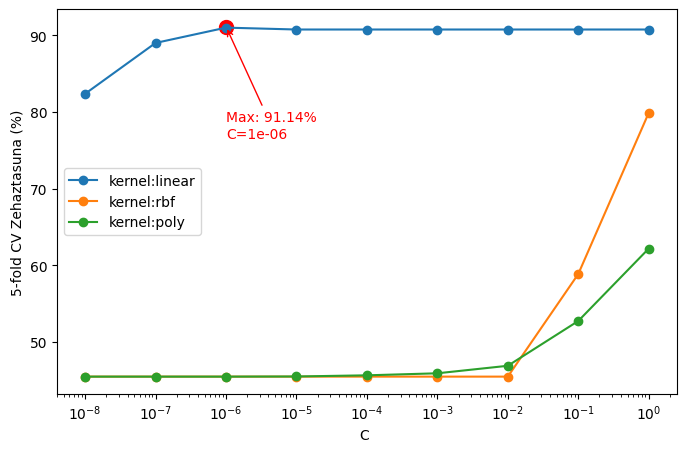

In [109]:
import matplotlib.pyplot as plt

C_graf = C_graf[:len(acc_graf_linear)]


acc_percent_linear = [a * 100 for a in acc_graf_linear]
acc_percent_rbf = [a * 100 for a in acc_graf_rbf]
acc_percent_poly = [a * 100 for a in acc_graf_poly]



max_idx = acc_percent.index(max(acc_percent))
max_C = C_graf[max_idx]
max_acc = acc_percent[max_idx]

plt.figure(figsize=(8,5))
plt.plot(C_graf, acc_percent_linear, marker='o', label='kernel:linear')
plt.plot(C_graf, acc_percent_rbf, marker='o', label='kernel:rbf')
plt.plot(C_graf, acc_percent_poly, marker='o', label='kernel:poly')
plt.xscale('log')
plt.xlabel('C ')
plt.ylabel('5-fold CV Zehaztasuna (%)')


plt.scatter([max_C], [max_acc], color='red', s=100,)
plt.annotate(f'Max: {max_acc:.2f}%\nC={max_C}', 
             xy=(max_C, max_acc), 
             xytext=(0, -80), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10,
             color='red')

plt.legend()
plt.savefig('accuracy_svm_oto.png')
plt.show()


## One-to-rest approach:
The breakdown is set to a binary classifier per each class. The classifier can use $\pmb{m}$ SVMs. Each SVM would predict membership in one of the $\pmb{m}$ classes:
![My Figure](Figures/onetorest.png)


In [17]:
params = {'estimator__C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3], 'estimator__kernel': ['linear', 'poly', 'rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.4min
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.4min
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.4min
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.5min
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.5min
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 2.7min
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 2.9min
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 3.0min
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 2.8min
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 3.1min
[CV] END ..........estimator__C=1e-07, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=1e-07, estimator

In [65]:
params = {'estimator__C': [1], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.5min
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.5min
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.6min
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.5min
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.5min
grid_search.best_params_ = {'estimator__C': 1, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.8191935340458449)


In [18]:
model = OneVsRestClassifier(SVC(random_state=42, kernel='linear', C=1e-6)) # best {'estimator__C': 1e-6, 'estimator__kernel': 'linear'}
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 92.2%


In [19]:
model = OneVsRestClassifier(SVC(random_state=42))
print(f'Accuracy: {fit_score(data, model)*100:.1f}%')

Accuracy: 82.9%


Barridoaren bitartez %9.3 hobetu da etekina:

{'C': 1e-6, 'kernel': 'linear'}

### Adierazpen grafikoa:

In [52]:
params = {'estimator__C': [1e-8], 'estimator__kernel': ['linear']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......estimator__C=1e-08, estimator__kernel=linear; total time= 2.2min
[CV] END .......estimator__C=1e-08, estimator__kernel=linear; total time= 2.0min
[CV] END .......estimator__C=1e-08, estimator__kernel=linear; total time= 2.0min
[CV] END .......estimator__C=1e-08, estimator__kernel=linear; total time= 1.9min
[CV] END .......estimator__C=1e-08, estimator__kernel=linear; total time= 2.0min
grid_search.best_params_ = {'estimator__C': 1e-08, 'estimator__kernel': 'linear'}
grid_search.best_score_ = np.float64(0.8404981060942862)


In [53]:
params = {'estimator__C': [1e-7], 'estimator__kernel': ['linear']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.5min
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.4min
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.4min
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.4min
[CV] END .......estimator__C=1e-07, estimator__kernel=linear; total time= 1.5min
grid_search.best_params_ = {'estimator__C': 1e-07, 'estimator__kernel': 'linear'}
grid_search.best_score_ = np.float64(0.8919661053118275)


In [54]:
params = {'estimator__C': [1e-6], 'estimator__kernel': ['linear']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......estimator__C=1e-06, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=1e-06, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=1e-06, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=1e-06, estimator__kernel=linear; total time= 1.4min
[CV] END .......estimator__C=1e-06, estimator__kernel=linear; total time= 1.6min
grid_search.best_params_ = {'estimator__C': 1e-06, 'estimator__kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9113838849074387)


In [55]:
params = {'estimator__C': [1e-5], 'estimator__kernel': ['linear']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......estimator__C=1e-05, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=1e-05, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=1e-05, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=1e-05, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=1e-05, estimator__kernel=linear; total time= 1.3min
grid_search.best_params_ = {'estimator__C': 1e-05, 'estimator__kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9064819589920509)


In [56]:
params = {'estimator__C': [1e-4], 'estimator__kernel': ['linear']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ......estimator__C=0.0001, estimator__kernel=linear; total time= 1.3min
[CV] END ......estimator__C=0.0001, estimator__kernel=linear; total time= 1.3min
[CV] END ......estimator__C=0.0001, estimator__kernel=linear; total time= 1.3min
[CV] END ......estimator__C=0.0001, estimator__kernel=linear; total time= 1.3min
[CV] END ......estimator__C=0.0001, estimator__kernel=linear; total time= 1.3min
grid_search.best_params_ = {'estimator__C': 0.0001, 'estimator__kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9064819589920509)


In [57]:
params = {'estimator__C': [1e-3], 'estimator__kernel': ['linear']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......estimator__C=0.001, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=0.001, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=0.001, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=0.001, estimator__kernel=linear; total time= 1.3min
[CV] END .......estimator__C=0.001, estimator__kernel=linear; total time= 1.3min
grid_search.best_params_ = {'estimator__C': 0.001, 'estimator__kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9064819589920509)


In [58]:
params = {'estimator__C': [1e-2], 'estimator__kernel': ['linear']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........estimator__C=0.01, estimator__kernel=linear; total time= 1.3min
[CV] END ........estimator__C=0.01, estimator__kernel=linear; total time= 1.3min
[CV] END ........estimator__C=0.01, estimator__kernel=linear; total time= 1.3min
[CV] END ........estimator__C=0.01, estimator__kernel=linear; total time= 1.3min
[CV] END ........estimator__C=0.01, estimator__kernel=linear; total time= 1.3min
grid_search.best_params_ = {'estimator__C': 0.01, 'estimator__kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9064819589920509)


In [59]:
params = {'estimator__C': [0.1], 'estimator__kernel': ['linear']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.3min
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.3min
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.3min
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.3min
[CV] END .........estimator__C=0.1, estimator__kernel=linear; total time= 1.3min
grid_search.best_params_ = {'estimator__C': 0.1, 'estimator__kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9064819589920509)


In [60]:
params = {'estimator__C': [1], 'estimator__kernel': ['linear']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........estimator__C=1, estimator__kernel=linear; total time= 1.3min
[CV] END ...........estimator__C=1, estimator__kernel=linear; total time= 1.3min
[CV] END ...........estimator__C=1, estimator__kernel=linear; total time= 1.3min
[CV] END ...........estimator__C=1, estimator__kernel=linear; total time= 1.4min
[CV] END ...........estimator__C=1, estimator__kernel=linear; total time= 1.3min
grid_search.best_params_ = {'estimator__C': 1, 'estimator__kernel': 'linear'}
grid_search.best_score_ = np.float64(0.9064819589920509)


### rbf

In [110]:
params = {'estimator__C': [1], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.5min
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.5min
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.5min
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.5min
[CV] END ..............estimator__C=1, estimator__kernel=rbf; total time= 2.5min
grid_search.best_params_ = {'estimator__C': 1, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.8191935340458449)


In [111]:
params = {'estimator__C': [0.1], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 3.4min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 3.3min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 3.3min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 3.3min
[CV] END ............estimator__C=0.1, estimator__kernel=rbf; total time= 3.3min
grid_search.best_params_ = {'estimator__C': 0.1, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.7200257855707503)


In [129]:
params = {'estimator__C': [1e-2], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........estimator__C=0.01, estimator__kernel=rbf; total time= 3.2min
[CV] END ...........estimator__C=0.01, estimator__kernel=rbf; total time= 3.2min
[CV] END ...........estimator__C=0.01, estimator__kernel=rbf; total time= 3.2min
[CV] END ...........estimator__C=0.01, estimator__kernel=rbf; total time= 3.2min
[CV] END ...........estimator__C=0.01, estimator__kernel=rbf; total time= 3.2min
grid_search.best_params_ = {'estimator__C': 0.01, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.6958920918321982)


In [113]:
params = {'estimator__C': [1e-3], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........estimator__C=0.001, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=0.001, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=0.001, estimator__kernel=rbf; total time= 3.2min
[CV] END ..........estimator__C=0.001, estimator__kernel=rbf; total time= 3.2min
[CV] END ..........estimator__C=0.001, estimator__kernel=rbf; total time= 3.1min
grid_search.best_params_ = {'estimator__C': 0.001, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.6973995696477158)


In [114]:
params = {'estimator__C': [1e-4], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........estimator__C=0.0001, estimator__kernel=rbf; total time= 3.1min
[CV] END .........estimator__C=0.0001, estimator__kernel=rbf; total time= 3.1min
[CV] END .........estimator__C=0.0001, estimator__kernel=rbf; total time= 3.2min
[CV] END .........estimator__C=0.0001, estimator__kernel=rbf; total time= 3.1min
[CV] END .........estimator__C=0.0001, estimator__kernel=rbf; total time= 3.1min
grid_search.best_params_ = {'estimator__C': 0.0001, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.6859002720822293)


In [115]:
params = {'estimator__C': [1e-5], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........estimator__C=1e-05, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=1e-05, estimator__kernel=rbf; total time= 3.2min
[CV] END ..........estimator__C=1e-05, estimator__kernel=rbf; total time= 3.2min
[CV] END ..........estimator__C=1e-05, estimator__kernel=rbf; total time= 3.2min
[CV] END ..........estimator__C=1e-05, estimator__kernel=rbf; total time= 3.2min
grid_search.best_params_ = {'estimator__C': 1e-05, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.684203403695339)


In [117]:
params = {'estimator__C': [1e-6], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........estimator__C=1e-06, estimator__kernel=rbf; total time= 3.2min
[CV] END ..........estimator__C=1e-06, estimator__kernel=rbf; total time= 3.3min
[CV] END ..........estimator__C=1e-06, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=1e-06, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=1e-06, estimator__kernel=rbf; total time= 3.1min
grid_search.best_params_ = {'estimator__C': 1e-06, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.6864668433126456)


In [118]:
params = {'estimator__C': [1e-7], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........estimator__C=1e-07, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=1e-07, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=1e-07, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=1e-07, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=1e-07, estimator__kernel=rbf; total time= 3.1min
grid_search.best_params_ = {'estimator__C': 1e-07, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.6866553447264063)


In [119]:
params = {'estimator__C': [1e-8], 'estimator__kernel': ['rbf']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........estimator__C=1e-08, estimator__kernel=rbf; total time= 3.1min
[CV] END ..........estimator__C=1e-08, estimator__kernel=rbf; total time= 3.4min
[CV] END ..........estimator__C=1e-08, estimator__kernel=rbf; total time= 3.3min
[CV] END ..........estimator__C=1e-08, estimator__kernel=rbf; total time= 3.4min
[CV] END ..........estimator__C=1e-08, estimator__kernel=rbf; total time= 3.3min
grid_search.best_params_ = {'estimator__C': 1e-08, 'estimator__kernel': 'rbf'}
grid_search.best_score_ = np.float64(0.6868438461401668)


### kernel:poly

In [120]:
params = {'estimator__C': [1], 'estimator__kernel': ['poly']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .............estimator__C=1, estimator__kernel=poly; total time= 2.6min
[CV] END .............estimator__C=1, estimator__kernel=poly; total time= 2.5min
[CV] END .............estimator__C=1, estimator__kernel=poly; total time= 2.5min
[CV] END .............estimator__C=1, estimator__kernel=poly; total time= 2.5min
[CV] END .............estimator__C=1, estimator__kernel=poly; total time= 2.4min
grid_search.best_params_ = {'estimator__C': 1, 'estimator__kernel': 'poly'}
grid_search.best_score_ = np.float64(0.7092753365461563)


In [121]:
params = {'estimator__C': [0.1], 'estimator__kernel': ['poly']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 2.8min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 2.8min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 2.8min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 2.8min
[CV] END ...........estimator__C=0.1, estimator__kernel=poly; total time= 3.1min
grid_search.best_params_ = {'estimator__C': 0.1, 'estimator__kernel': 'poly'}
grid_search.best_score_ = np.float64(0.6440433553251649)


In [122]:
params = {'estimator__C': [1e-2], 'estimator__kernel': ['poly']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........estimator__C=0.01, estimator__kernel=poly; total time= 3.4min
[CV] END ..........estimator__C=0.01, estimator__kernel=poly; total time= 3.2min
[CV] END ..........estimator__C=0.01, estimator__kernel=poly; total time= 3.3min
[CV] END ..........estimator__C=0.01, estimator__kernel=poly; total time= 3.4min
[CV] END ..........estimator__C=0.01, estimator__kernel=poly; total time= 3.2min
grid_search.best_params_ = {'estimator__C': 0.01, 'estimator__kernel': 'poly'}
grid_search.best_score_ = np.float64(0.651775114256753)


In [123]:
params = {'estimator__C': [1e-3], 'estimator__kernel': ['poly']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........estimator__C=0.001, estimator__kernel=poly; total time= 3.2min
[CV] END .........estimator__C=0.001, estimator__kernel=poly; total time= 3.4min
[CV] END .........estimator__C=0.001, estimator__kernel=poly; total time= 3.4min
[CV] END .........estimator__C=0.001, estimator__kernel=poly; total time= 3.6min
[CV] END .........estimator__C=0.001, estimator__kernel=poly; total time= 3.7min
grid_search.best_params_ = {'estimator__C': 0.001, 'estimator__kernel': 'poly'}
grid_search.best_score_ = np.float64(0.6847696192627104)


In [124]:
params = {'estimator__C': [1e-4], 'estimator__kernel': ['poly']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........estimator__C=0.0001, estimator__kernel=poly; total time= 3.3min
[CV] END ........estimator__C=0.0001, estimator__kernel=poly; total time= 3.7min
[CV] END ........estimator__C=0.0001, estimator__kernel=poly; total time= 3.0min
[CV] END ........estimator__C=0.0001, estimator__kernel=poly; total time= 3.0min
[CV] END ........estimator__C=0.0001, estimator__kernel=poly; total time= 3.0min
grid_search.best_params_ = {'estimator__C': 0.0001, 'estimator__kernel': 'poly'}
grid_search.best_score_ = np.float64(0.6985330677715933)


In [125]:
params = {'estimator__C': [1e-5], 'estimator__kernel': ['poly']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........estimator__C=1e-05, estimator__kernel=poly; total time= 3.1min
[CV] END .........estimator__C=1e-05, estimator__kernel=poly; total time= 3.1min
[CV] END .........estimator__C=1e-05, estimator__kernel=poly; total time= 3.0min
[CV] END .........estimator__C=1e-05, estimator__kernel=poly; total time= 3.0min
[CV] END .........estimator__C=1e-05, estimator__kernel=poly; total time= 3.0min
grid_search.best_params_ = {'estimator__C': 1e-05, 'estimator__kernel': 'poly'}
grid_search.best_score_ = np.float64(0.46414685327121086)


In [126]:
params = {'estimator__C': [1e-6], 'estimator__kernel': ['poly']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........estimator__C=1e-06, estimator__kernel=poly; total time= 3.0min
[CV] END .........estimator__C=1e-06, estimator__kernel=poly; total time= 3.3min
[CV] END .........estimator__C=1e-06, estimator__kernel=poly; total time= 2.9min
[CV] END .........estimator__C=1e-06, estimator__kernel=poly; total time= 3.1min
[CV] END .........estimator__C=1e-06, estimator__kernel=poly; total time= 3.3min
grid_search.best_params_ = {'estimator__C': 1e-06, 'estimator__kernel': 'poly'}
grid_search.best_score_ = np.float64(0.24714687105436312)


In [127]:
params = {'estimator__C': [1e-7], 'estimator__kernel': ['poly']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 3.0min
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 2.8min
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 3.2min
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 2.8min
[CV] END .........estimator__C=1e-07, estimator__kernel=poly; total time= 2.7min
grid_search.best_params_ = {'estimator__C': 1e-07, 'estimator__kernel': 'poly'}
grid_search.best_score_ = np.float64(0.08200398342610211)


In [128]:
params = {'estimator__C': [1e-8], 'estimator__kernel': ['poly']}
model = OneVsRestClassifier(SVC(random_state=42))
grid_search = search_hyperparameters(data, model, params,  verbose=2)


print(f'{grid_search.best_params_ = }')
print(f'{grid_search.best_score_ = }')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........estimator__C=1e-08, estimator__kernel=poly; total time= 2.7min
[CV] END .........estimator__C=1e-08, estimator__kernel=poly; total time= 2.7min
[CV] END .........estimator__C=1e-08, estimator__kernel=poly; total time= 2.7min
[CV] END .........estimator__C=1e-08, estimator__kernel=poly; total time= 2.7min
[CV] END .........estimator__C=1e-08, estimator__kernel=poly; total time= 3.0min
grid_search.best_params_ = {'estimator__C': 1e-08, 'estimator__kernel': 'poly'}
grid_search.best_score_ = np.float64(0.061645475076912135)


In [133]:


C_graf = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1]
acc_graf_linear = [0.8404981060942862, 0.8919661053118275, 0.9113838849074387, 0.9064819589920509, 0.9064819589920509, 0.9064819589920509, 0.9064819589920509, 0.9064819589920509, 0.9064819589920509]
acc_graf_rbf = [0.6868438461401668, 0.6866553447264063, 0.6864668433126456, 0.684203403695339, 0.6859002720822293, 0.6973995696477158, 0.6958920918321982, 0.7200257855707503 , 0.8191935340458449]
acc_graf_poly = [0.061645475076912135, 0.08200398342610211, 0.24714687105436312, 0.46414685327121086, 0.6985330677715933, 0.6847696192627104, 0.651775114256753, 0.6440433553251649, 0.7092753365461563]


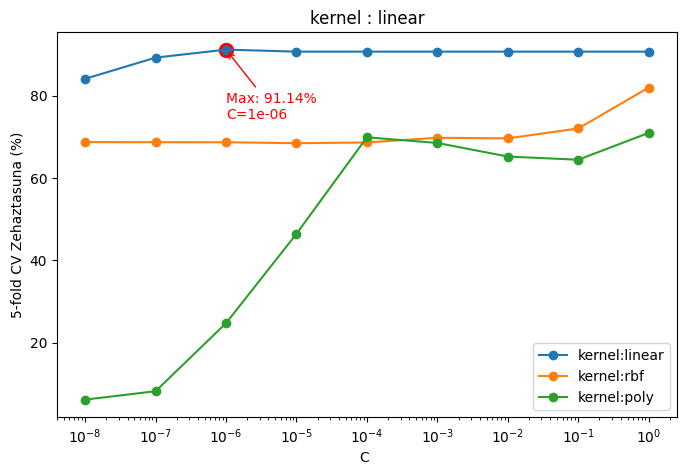

In [136]:
import matplotlib.pyplot as plt

C_graf = C_graf[:len(acc_graf)]


acc_percent_linear = [a * 100 for a in acc_graf_linear]
acc_percent_rbf = [a * 100 for a in acc_graf_rbf]
acc_percent_poly = [a * 100 for a in acc_graf_poly]

max_idx = acc_percent.index(max(acc_percent))
max_C = C_graf[max_idx]
max_acc = acc_percent[max_idx]

plt.figure(figsize=(8,5))
plt.plot(C_graf, acc_percent_linear, marker='o', label='kernel:linear')
plt.plot(C_graf, acc_percent_rbf, marker='o', label='kernel:rbf')
plt.plot(C_graf, acc_percent_poly, marker='o', label='kernel:poly')
plt.xscale('log')
plt.xlabel('C ')
plt.ylabel('5-fold CV Zehaztasuna (%)')
plt.title('kernel : linear')


plt.scatter([max_C], [max_acc], color='red', s=100,)
plt.annotate(f'Max: {max_acc:.2f}%\nC={max_C}', 
             xy=(max_C, max_acc), 
             xytext=(0, -50), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10,
             color='red')

plt.legend()
plt.savefig('accuracy_svm_otr.png')
plt.show()


### Modeloak probatzen

In [20]:
def sailkapena(esaldi, model):
    pred = model.predict(esaldi)
    match pred[0]:
        case 0.0:
            return("Gizartea")
        case 1.0:
            return("Politika")
        case 2.0:
            return("Kirola")
        case 3.0:
            return("Zientzia eta teknologia")
        case 4.0:
            return("Ekonomia")
        case 5.0:
            return("Historia")
        case 6.0:
            return("Geografia")

In [21]:
with open('Data def/hegoafrika.bin', 'rb') as f:
    esaldia_g = np.load(f)
with open('Data def/altuna.bin', 'rb') as f:
    esaldia_k = np.load(f)

In [23]:
model_oto = SVC(random_state=42, kernel = 'linear', C = 1e-6 )
print(f'Accuracy: {fit_score(data, model_oto)*100:.1f}%')
model_otr = OneVsRestClassifier(SVC(random_state=42, kernel ='linear', C = 1e-6 )) # best {'estimator__C': 0.01, 'estimator__kernel': 'linear'}
print(f'Accuracy: {fit_score(data, model_otr)*100:.1f}%')

Accuracy: 91.6%
Accuracy: 92.2%


In [24]:
print(sailkapena(esaldia_g,model_oto))
print(sailkapena(esaldia_g,model_otr))
print(sailkapena(esaldia_k,model_oto))
print(sailkapena(esaldia_k,model_otr))

Geografia
Geografia
Kirola
Kirola
